# Time Series Analysis

We investigate our predicted "relevant" tweets over time in order to determine a threshold that constitutes a "disaster".

## Table of Contents

1. [Collecting Tweets](01-Gathering-Data.ipynb)
1. [Feature Engineering with TF-IDF](02-Feature-Engineering.ipynb)
1. [Benchmark Model](03-Benchmark-Model.ipynb)
1. [Feature Engineering & Model Tuning with Doc2Vec](04-Model-Tuning.ipynb)
1. [Making Predictions on Test Data](05-Making-Predictions.ipynb)
1. [Visualizing a Disaster Event](06-Time-Series-Analysis.ipynb)

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Predictions

In [2]:
fire_tweets = pd.read_csv('../data/predictions/2018-07-12_2018-07-13_wildfire OR forest+fire.csv')
fire_tweets.set_index(pd.to_datetime(fire_tweets['date']), inplace = True)
fire_tweets.drop(columns = ['date'], inplace = True)

recent_tweets = pd.read_csv('../data/predictions/2019-01-15_2019-01-16_wildfire OR forest+fire.csv')
recent_tweets.set_index(pd.to_datetime(recent_tweets['date']), inplace = True)
recent_tweets.drop(columns = ['date'], inplace = True)

### Distribution of Probability of Urgent Tweets

The higher the probability, the more "urgent" the tweet.

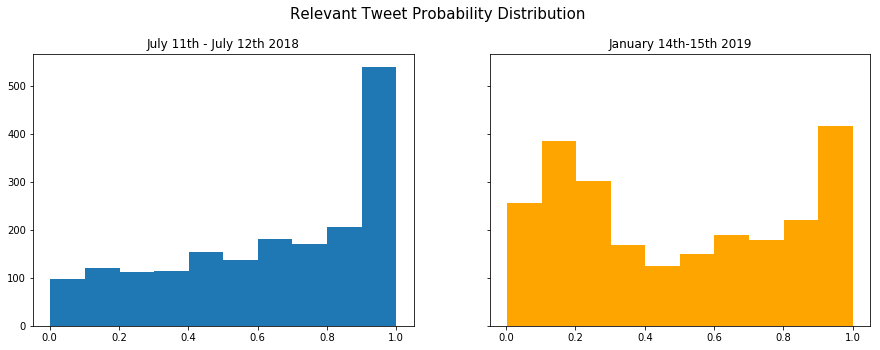

In [3]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5), sharey = True);

fig.suptitle('Relevant Tweet Probability Distribution', size = 15, y=1.01) 

ax[0].hist(fire_tweets['proba'])
ax[0].title.set_text('July 11th - July 12th 2018')

ax[1].hist(recent_tweets['proba'], color='orange')
ax[1].title.set_text('January 14th-15th 2019');

The distribution of our probabilities of "relevant" tweets differ between our time periods. 
 - There is a higher volume of "irrelevant" tweets in the more recent time period, which we expected as there are no "wild fire" or "forestfire" disasters happening in this range.

### Visualize a disaster event

We chart the rolling sum of urgent tweets within a 5 minute period for both date ranges.


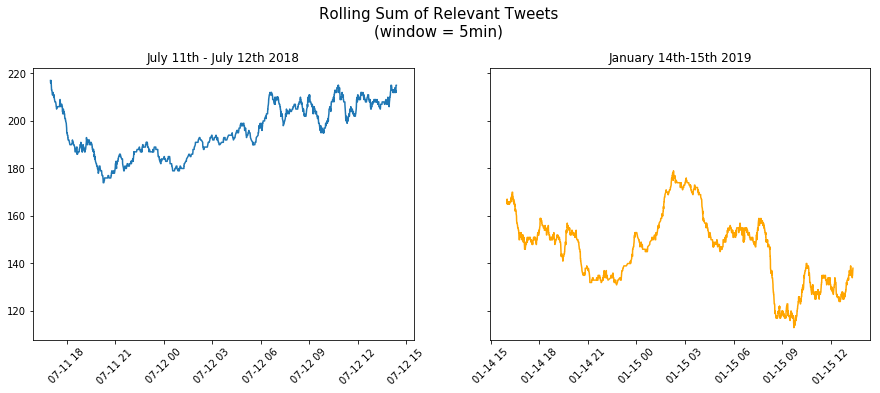

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5),sharey = True)
fig.suptitle('Rolling Sum of Relevant Tweets\n(window = 5min)', size = 15, y =1.05) 

ax[0].plot(fire_tweets['pred'].rolling(window=300).sum())
ax[0].title.set_text('July 11th - July 12th 2018')


ax[1].plot(recent_tweets['pred'].rolling(window=300).sum(), color = 'orange');
ax[1].title.set_text('January 14th-15th 2019');

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


We graph the relative precentage of urgent tweets over a 5 minute window.

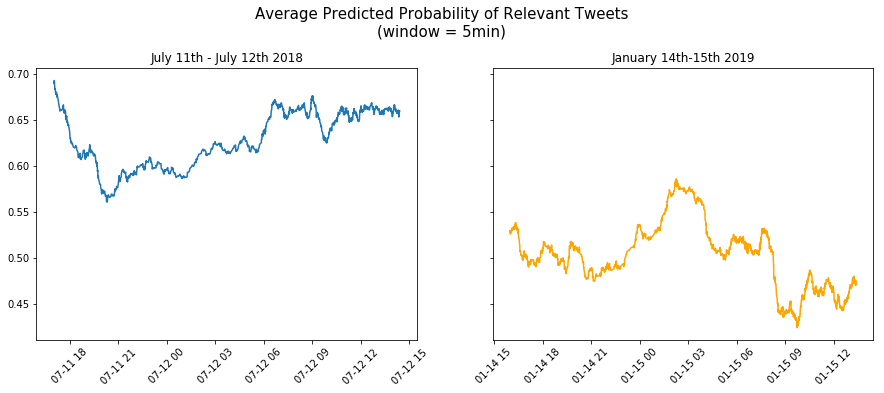

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5),sharey = True)
fig.suptitle('Average Predicted Probability of Relevant Tweets\n(window = 5min)', size = 15, y =1.05) 

ax[0].plot(fire_tweets['proba'].rolling(window=300).mean())
ax[0].title.set_text('July 11th - July 12th 2018')


ax[1].plot(recent_tweets['proba'].rolling(window=300).mean(), color = 'orange');
ax[1].title.set_text('January 14th-15th 2019');

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)=